Análise de Dados com AI, ML e Scikit-learn sobre
Saúde do sono e estilo de vida

Integrantes:

           Arthur Baldissera Claumann Marcos  RM550219

           Miguel Ruan Souza  RM551239

In [17]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix



file_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)




In [6]:
#Exploração e Limpeza dos Dados

#Verificando se há valores ausentes no dataset
missing_values = df.isnull().sum()

#Verificando valores duplicados no dataset
duplicate_rows = df.duplicated().sum()

#Verificando estatísticas descritivas iniciais
summary_statistics = df.describe()

missing_values, duplicate_rows, summary_statistics


(Person ID                    0
 Gender                       0
 Age                          0
 Occupation                   0
 Sleep Duration               0
 Quality of Sleep             0
 Physical Activity Level      0
 Stress Level                 0
 BMI Category                 0
 Blood Pressure               0
 Heart Rate                   0
 Daily Steps                  0
 Sleep Disorder             219
 dtype: int64,
 0,
         Person ID         Age  Sleep Duration  Quality of Sleep  \
 count  374.000000  374.000000      374.000000        374.000000   
 mean   187.500000   42.184492        7.132086          7.312834   
 std    108.108742    8.673133        0.795657          1.196956   
 min      1.000000   27.000000        5.800000          4.000000   
 25%     94.250000   35.250000        6.400000          6.000000   
 50%    187.500000   43.000000        7.200000          7.000000   
 75%    280.750000   50.000000        7.800000          8.000000   
 max    374.000000   

# 1. Qual a relação entre a duração do sono e a qualidade do sono?

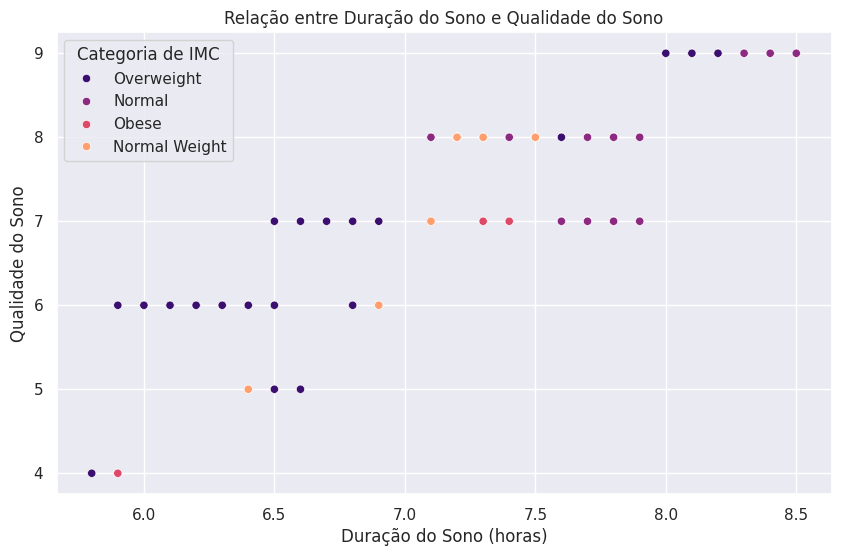

In [7]:


sns.set(style="darkgrid")

# Gráfico de dispersão para relação entre Duração do Sono e Qualidade do Sono
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Sleep Duration", y="Quality of Sleep", hue="BMI Category", palette="magma")
plt.title("Relação entre Duração do Sono e Qualidade do Sono")
plt.xlabel("Duração do Sono (horas)")
plt.ylabel("Qualidade do Sono")
plt.legend(title="Categoria de IMC")
plt.show()




O gráfico nos mostra uma correlação positiva entre duração do sono e qualidade do sono: quanto maior a duração do sono, maior a qualidade do sono, e também nos mostra que o IMC(Índice de Massa Corporal) tem uma importância considerável, quanto maior o peso do indivíduo a qualidade do sono tende a decair, um exemplo é que pegando as pessoas Obesas (pela cor da categoria do IMC) o melhor nível de Qualidade de sono é de 7, quanto de uma pessoa com um peso normal o melhor nível é 9.

In [8]:


# Preparação dos dados
# - Regressão: Prevemos "Qualidade do Sono"


# Converter coluna de Distúrbio do Sono para binário
df['Sleep Disorder Binary'] = df['Sleep Disorder'].apply(lambda x: 1 if x != 'None' else 0)

# Regressão - Qualidade do Sono
X_reg = df[['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']]
y_reg = df['Quality of Sleep']



# Divisão dos dados em treino e teste (70% treino, 30% teste)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


# Modelo de Regressão Linear
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)  # Treinamento do modelo
y_pred_reg = reg_model.predict(X_test_reg)  # Predição no conjunto de teste
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)


# Resultados
print(f"Erro Quadrático Médio para Regressão: {rmse}")



Erro Quadrático Médio para Regressão: 0.3781140565866092


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


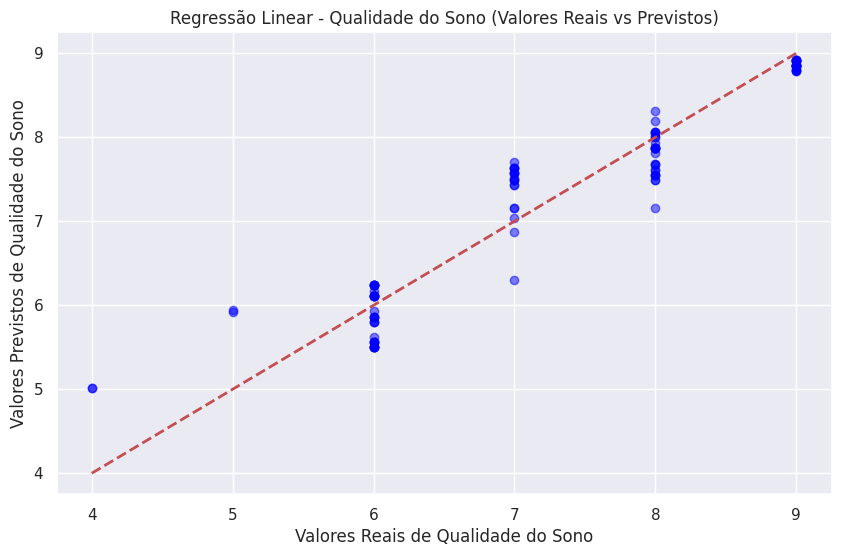

In [9]:


# Plot dos valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel("Valores Reais de Qualidade do Sono")
plt.ylabel("Valores Previstos de Qualidade do Sono")
plt.title("Regressão Linear - Qualidade do Sono (Valores Reais vs Previstos)")
plt.show()



# 2. Como o nível de atividade física influencia a qualidade do sono?

Text(0, 0.5, 'Qualidade do Sono')

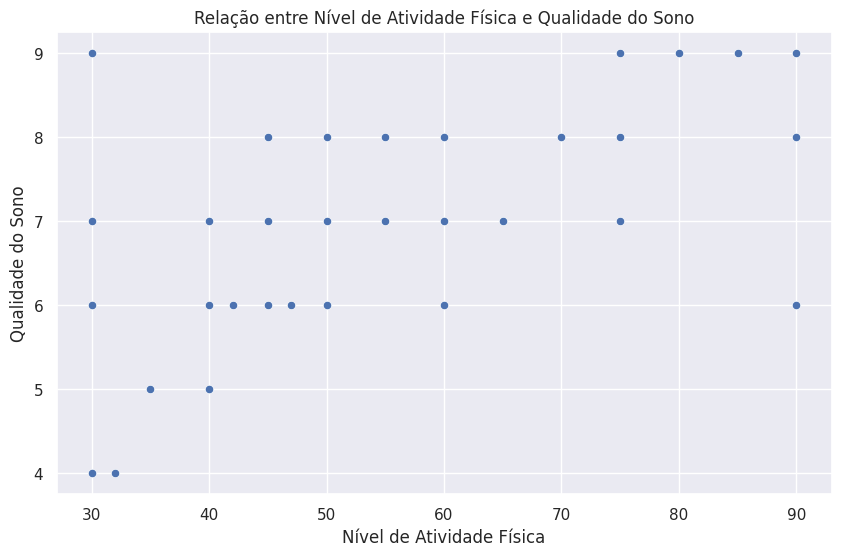

In [10]:

# Visualização da relação entre nível de atividade física e qualidade do sono
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df,)
plt.title('Relação entre Nível de Atividade Física e Qualidade do Sono')
plt.xlabel('Nível de Atividade Física')
plt.ylabel('Qualidade do Sono')




A análise inicial mostra que:

O Nível de Atividade Física varia entre 30 e 90, com uma média de 59.
A Qualidade do Sono tem média de 7, com valores que variam de 4 a 9.
A visualização sugere uma possível correlação positiva entre atividade física e qualidade do sono e é perceptível que quanto maior o Nível de Atividade Física maior a Qualidade do sono.

# 3. Quais são as profissões com maior nivel de estresse ?


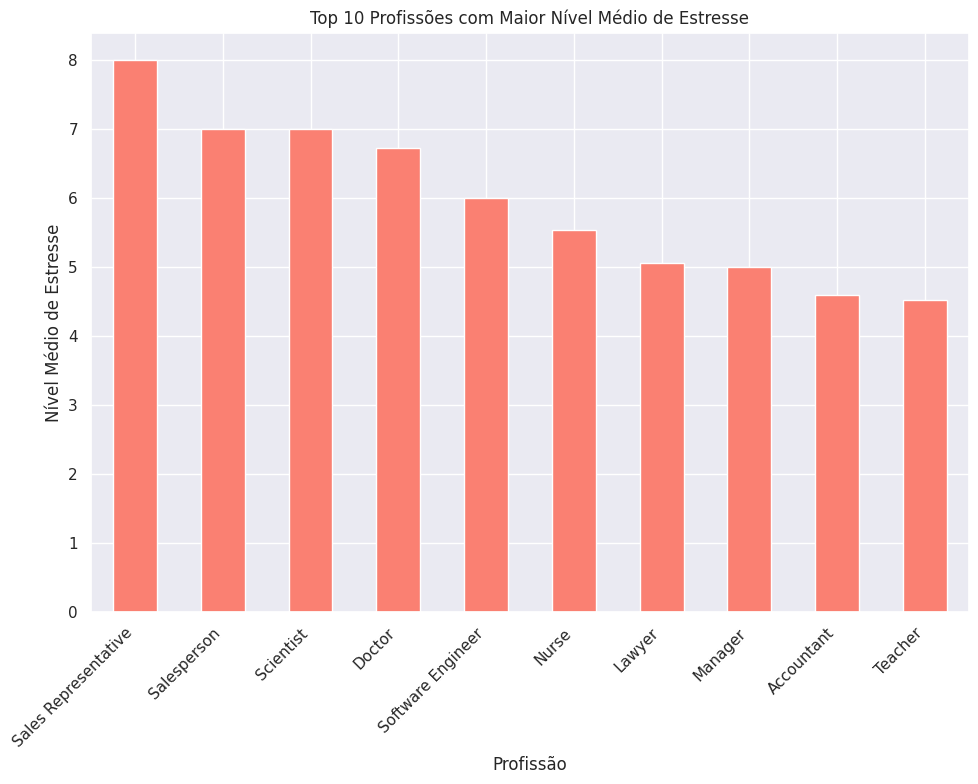

In [ ]:

# Agrupando os dados por profissão e calcular o nível médio de estresse
occupation_stress = df.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False)

# Plotar as profissões com os maiores níveis médios de estresse
plt.figure(figsize=(10, 8))
occupation_stress.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Profissões com Maior Nível Médio de Estresse')
plt.xlabel('Profissão')
plt.ylabel('Nível Médio de Estresse')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Analisando o gráfico das profissões com maiores níveis médios de estresse, podemos perceber que Ambientes competitivos e com metas como Representantes de vendas e posições ligadas a gerenciamento aparecem entre os mais estressados, profissões de alta responsabilidade e intensidade como médicos, e engenheiros de softwares que possuem altas demandas com prazos curtos tendem a elevar o nível de estresse também.

# 4. Existe uma correlação entre o nível de estresse e a qualidade do sono?

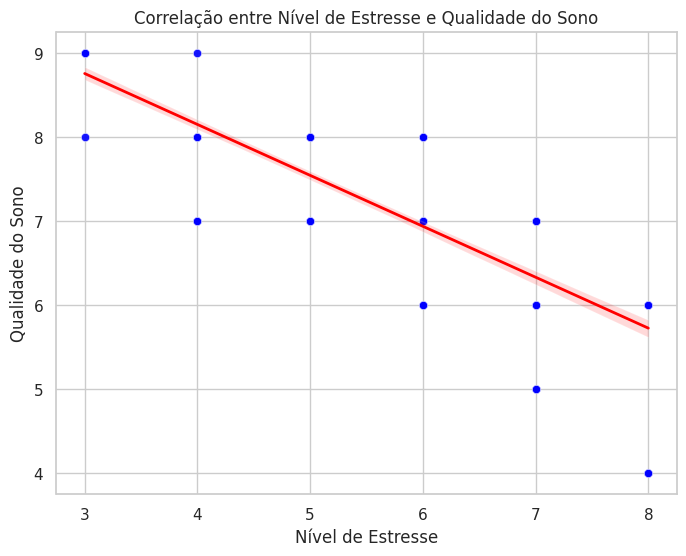

In [ ]:


# Tamanho e Estilo do gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Gráfico de scatter plot para visualizar a relação entre 'Nível de Estresse' e 'Qualidade do sono'
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep', color='blue', alpha=0.7)


sns.regplot(data=df, x='Stress Level', y='Quality of Sleep', scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Correlação entre Nível de Estresse e Qualidade do Sono')
plt.xlabel('Nível de Estresse')
plt.ylabel('Qualidade do Sono')


plt.show()


Analisando o gráfico percebemos uma correlação negativa entre o nível de estresse e a qualidade do sono, medida que o nível de estresse aumenta, a qualidade do sono tende a diminuir. Essa correlação negativa é estatisticamente significativa e sugere que o estresse pode ter um impacto direto sobre o sono.

# 5. O distúrbio do sono é mais comum em determinadas categorias de IMC?

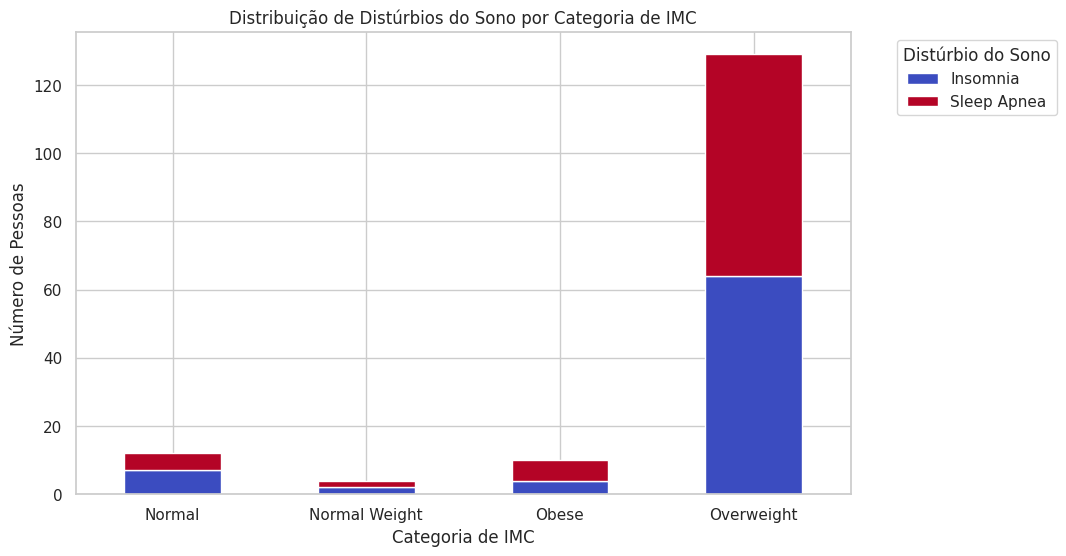

In [ ]:

# Contar a ocorrência de distúrbios do sono em cada categoria de IMC(Índice de Massa Corporal)
sleep_disorder_counts = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)

# Configurando o gráfico
plt.figure(figsize=(10, 6))
sleep_disorder_counts.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
plt.title("Distribuição de Distúrbios do Sono por Categoria de IMC")
plt.xlabel("Categoria de IMC")
plt.ylabel("Número de Pessoas")
plt.legend(title="Distúrbio do Sono", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()


O gráfico mostra a distribuição de distúrbios do sono entre as diferentes categorias de IMC. Observa-se que a categoria Obeso tende a ter uma maior incidência de distúrbios do sono, como apneia e insônia, em comparação com as categorias Normal e Sobrepeso (Overweight). Isso sugere uma possível associação entre um IMC mais alto e uma maior probabilidade de distúrbios do sono, especialmente na categoria Obeso.

# 6. Pessoas com distúrbios do sono e faixas etárias distintas têm frequências cardíacas diferentes da média?

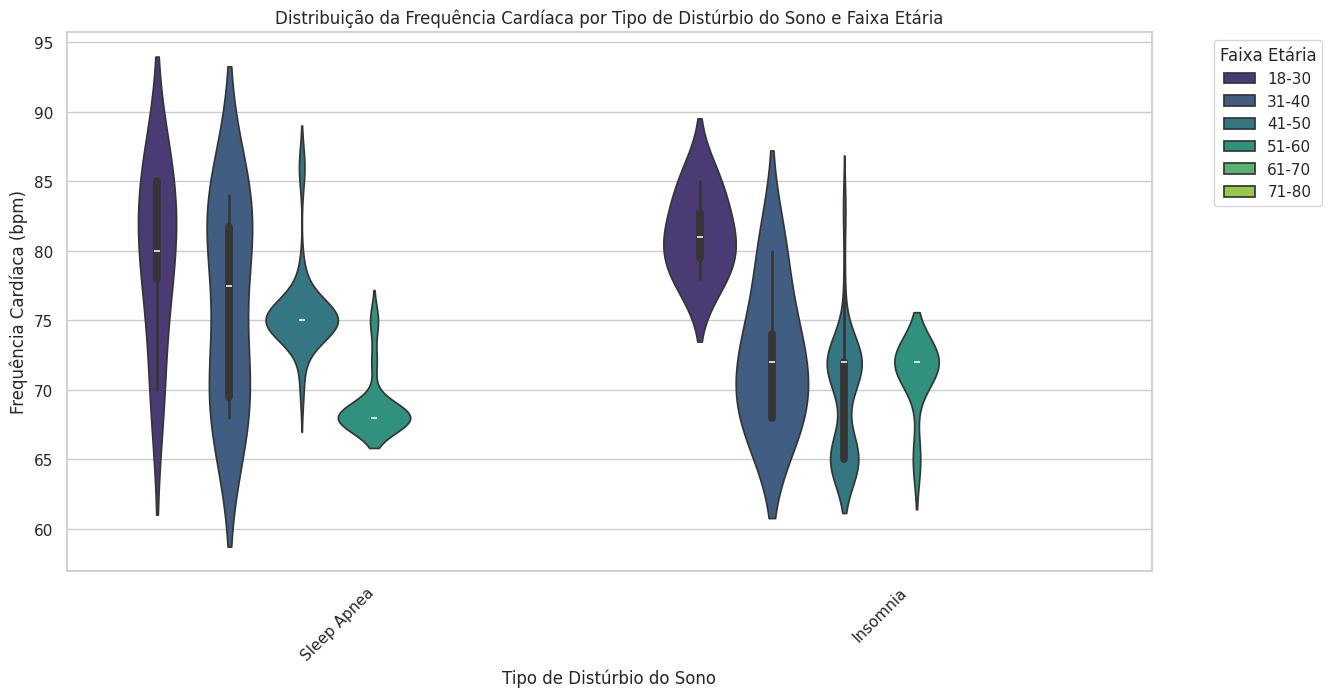

In [ ]:


#Separando a Faixa Etária
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 80],
                         labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

#Criando o Gráfico
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, x='Sleep Disorder', y='Heart Rate', hue='Age Group', palette='viridis')


plt.title("Distribuição da Frequência Cardíaca por Tipo de Distúrbio do Sono e Faixa Etária")
plt.xlabel("Tipo de Distúrbio do Sono")
plt.ylabel("Frequência Cardíaca (bpm)")
plt.xticks(rotation=45)
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


O gráfico mostra a distribuição da frequência cardíaca (em bpm) entre os participantes, diferenciada por tipo de distúrbio do sono e idade.

Distribuição da Frequência Cardíaca por Distúrbio do Sono: É possível observar que participantes com certos tipos de distúrbios (como a apneia do sono) tendem a ter uma distribuição de frequência cardíaca mais ampla e elevada em comparação aos que não possuem distúrbio.

Idade e Frequência Cardíaca: A inclusão da idade revela que a variabilidade na frequência cardíaca não depende somente do distúrbio do sono, mas também pode variar com a idade. Por exemplo, para alguns distúrbios, observamos uma maior amplitude de variação na frequência cardíaca em diferentes faixas etárias.

# 7. Qual a relação entre a quantidade de passos diários e o nível de atividade física?

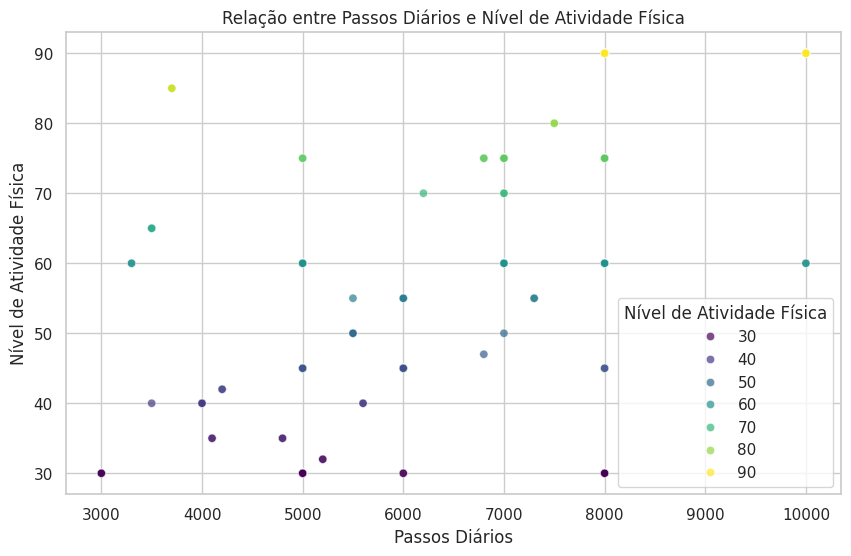

In [ ]:


# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Daily Steps', y='Physical Activity Level', hue='Physical Activity Level', palette='viridis', alpha=0.7 )
plt.title('Relação entre Passos Diários e Nível de Atividade Física')
plt.xlabel('Passos Diários')
plt.ylabel('Nível de Atividade Física')
plt.legend(title='Nível de Atividade Física')
plt.grid(True)

plt.show()


Observa-se uma tendência de correlação positiva — conforme o número de passos diários aumenta, o nível de atividade física também tende a ser mais alto.

Distribuição: Existe uma variação considerável no nível de atividade física para uma mesma quantidade de passos. Isso sugere que o nível de atividade física pode ser influenciado por outros fatores além da quantidade de passos, como a intensidade e a duração das atividades realizadas.



# 8. A pressão arterial e a frequência cardíaca têm impacto na qualidade do sono?


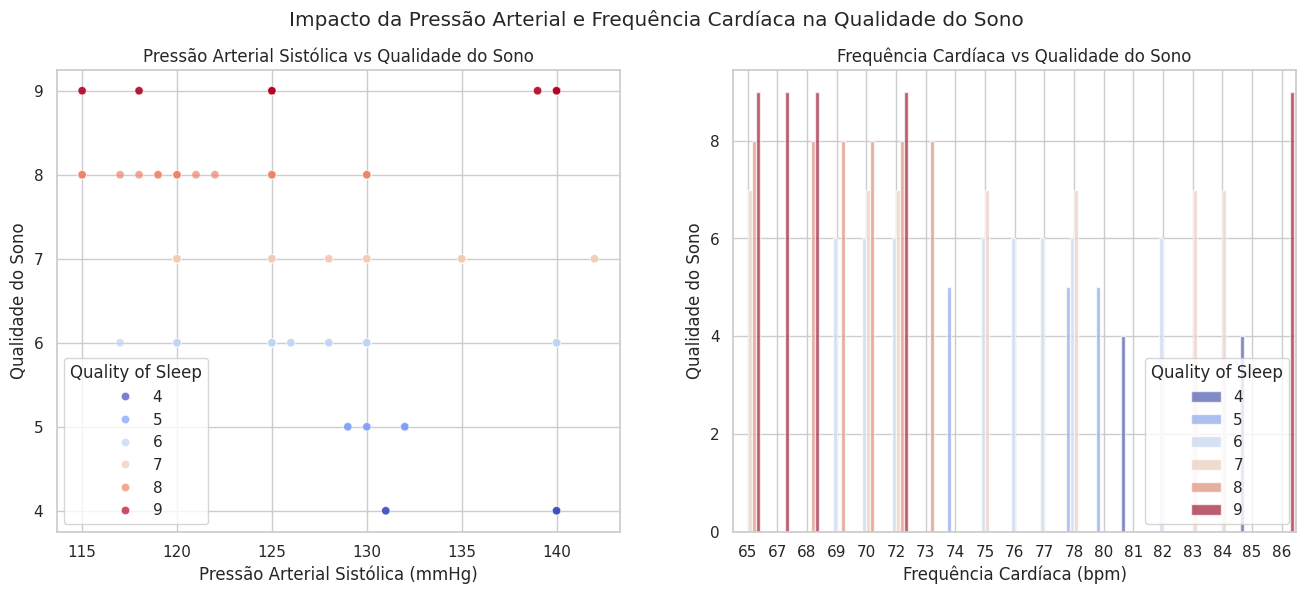

In [ ]:
# Separar os valores sistólicos e diastólicos da pressão arterial
#Pressão Sistólica:

#Representa a pressão nas artérias quando o coração se contrai para bombear o sangue. Esse é o valor mais alto na leitura de pressão arterial.
#É o primeiro número em uma medição de pressão (por exemplo, em 120/80, o 120 é a pressão sistólica).

df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')


# Configuração do gráfico com duas subplots para Pressão Arterial e Frequência Cardíaca
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Impacto da Pressão Arterial e Frequência Cardíaca na Qualidade do Sono')

# Gráfico da Pressão Arterial Sistólica vs Qualidade do Sono
sns.scatterplot(data=df, x='Systolic_BP', y='Quality of Sleep', hue='Quality of Sleep', palette='coolwarm', ax=axes[0], alpha=0.7)
axes[0].set_title('Pressão Arterial Sistólica vs Qualidade do Sono')
axes[0].set_xlabel('Pressão Arterial Sistólica (mmHg)')
axes[0].set_ylabel('Qualidade do Sono')
axes[0].grid(True)


# Gráfico da Frequência Cardíaca vs Qualidade do Sono
sns.barplot(data=df, x='Heart Rate', y='Quality of Sleep', hue='Quality of Sleep', palette='coolwarm', ax=axes[1], alpha=0.7)
axes[1].set_title('Frequência Cardíaca vs Qualidade do Sono')
axes[1].set_xlabel('Frequência Cardíaca (bpm)')
axes[1].set_ylabel('Qualidade do Sono')
axes[1].grid(True)


plt.show()


Os gráficos mostram a relação entre a qualidade do sono e os valores de pressão arterial sistólica e frequência cardíaca.

Pressão Arterial Sistólica e Qualidade do Sono:

Não há uma correlação clara entre a pressão arterial sistólica e a qualidade do sono. A qualidade do sono parece variar independentemente dos valores sistólicos, indicando que apenas a pressão arterial pode não ser um determinante direto da qualidade do sono.
Frequência Cardíaca e Qualidade do Sono:

Embora também não haja uma relação evidente, podemos notar uma leve tendência de que frequências cardíacas mais baixas (abaixo de 80 bpm) estão associadas a uma qualidade de sono ligeiramente melhor.
Essa análise sugere que, embora pressão arterial e frequência cardíaca possam influenciar a saúde geral, elas não mostram uma relação direta com a qualidade do sono isoladamente. ​

# 9. Quais variáveis são preditores mais fortes de uma boa qualidade de sono?

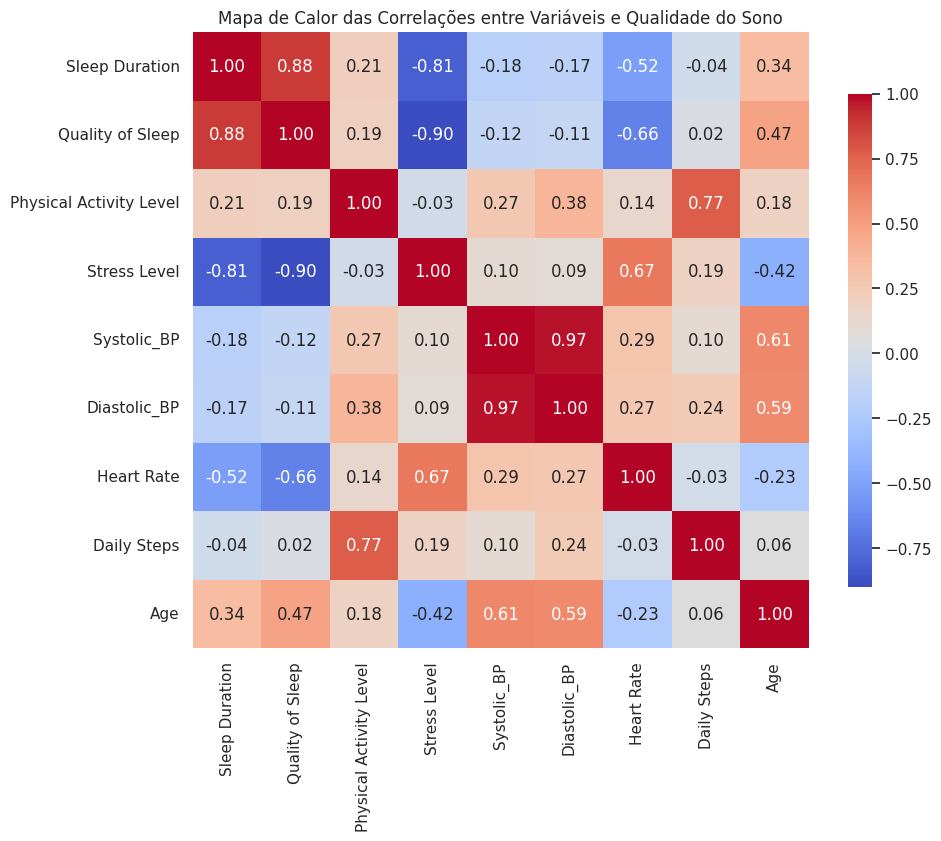

In [ ]:


# Selecionar variáveis a para análise
numeric_data = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                     'Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Daily Steps', 'Age']]

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': .8})
plt.title('Mapa de Calor das Correlações entre Variáveis e Qualidade do Sono')
plt.show()


  O mapa de calor mostra as correlações entre a Qualidade do Sono e outras variáveis numéricas.

Variáveis com maior correlação com a Qualidade do Sono são:

Duração do Sono: Há uma correlação positiva, sugerindo que dormir mais horas pode melhorar a qualidade do sono.

Nível de Estresse: Apresenta uma correlação negativa; níveis mais altos de estresse tendem a reduzir a qualidade do sono.

Nível de Atividade Física: Uma correlação levemente positiva indica que pessoas com mais atividade física podem ter uma qualidade de sono melhor.

# 10. As mulheres e os homens diferem nos fatores que mais afetam a qualidade do sono?

<Figure size 1200x600 with 0 Axes>

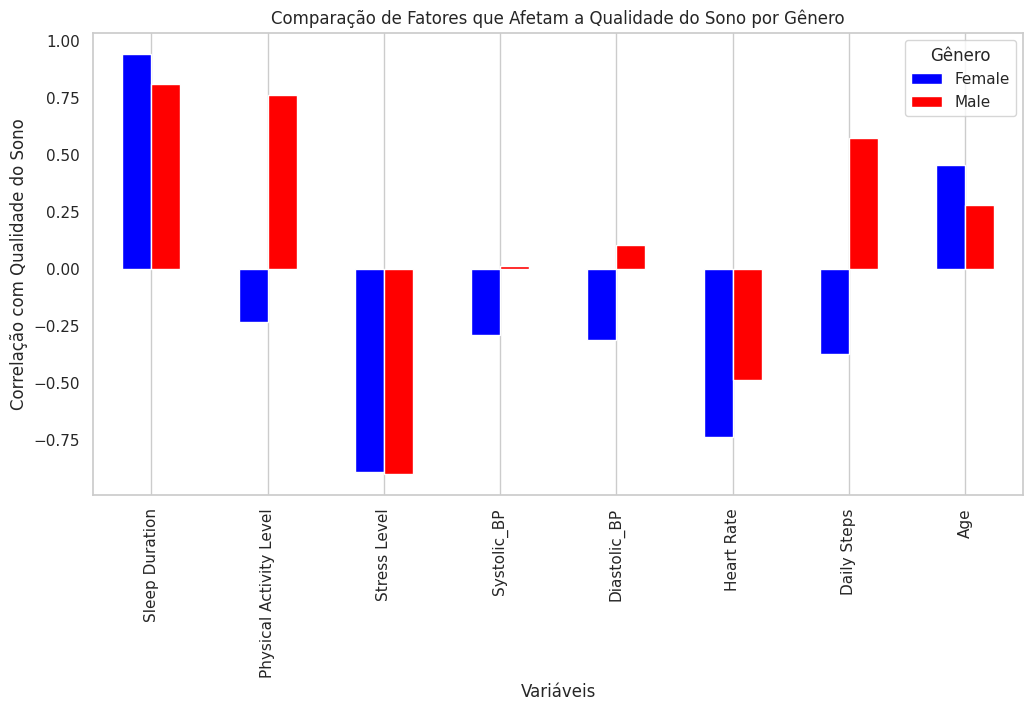

In [ ]:
# Separando os dados por gênero
data_female = df[df['Gender'] == 'Female']
data_male = df[df['Gender'] == 'Male']

# Calculando a correlação para cada gênero

# Mulheres
corr_female = data_female[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                           'Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate',
                           'Daily Steps', 'Age']].corr()['Quality of Sleep'].drop('Quality of Sleep')
# Homens
corr_male = data_male[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                       'Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate',
                       'Daily Steps', 'Age']].corr()['Quality of Sleep'].drop('Quality of Sleep')

# Combinar os dados em um DataFrame para comparação
gender_corr_df = pd.DataFrame({'Female': corr_female, 'Male': corr_male})

# Plotar as correlações lado a lado para comparação e melhor visualização
plt.figure(figsize=(12, 6))
gender_corr_df.plot(kind='bar', figsize=(12, 6), colormap='bwr')
plt.title('Comparação de Fatores que Afetam a Qualidade do Sono por Gênero')
plt.xlabel('Variáveis')
plt.ylabel('Correlação com Qualidade do Sono')
plt.legend(title='Gênero')
plt.grid(axis='y')

plt.show()


  O gráfico compara as correlações entre diversas variáveis e a qualidade do sono para homens e mulheres.

Duração do Sono: Tanto para homens quanto para mulheres, a duração do sono tem uma correlação positiva semelhante com a qualidade do sono, embora ligeiramente mais forte nas mulheres.

Nível de Estresse: A correlação negativa com a qualidade do sono é mais acentuada nas mulheres, indicando que o estresse pode impactar mais a qualidade do sono feminino.

Atividade Física: Mostra uma correlação positiva com a qualidade do sono em ambos os gêneros, mas é ligeiramente mais pronunciada nos homens.

Outras Variáveis: Não há diferenças significativas entre homens e mulheres para pressão arterial e frequência cardíaca em relação à qualidade do sono.

Essas diferenças sugerem que fatores como estresse e duração do sono podem ter impactos ligeiramente distintos na qualidade do sono dependendo do gênero.

# Conclusão
### Este estudo explorou a relação entre qualidade do sono e diferentes variáveis de estilo de vida e saúde, fornecendo insights valiosos sobre como fatores como duração do sono, atividade física, níveis de estresse e características fisiológicas podem impactar a saúde do sono. Os principais achados incluem:

### Duração e Qualidade do Sono: Observou-se uma correlação positiva entre duração do sono e qualidade, sugerindo que noites de sono mais longas geralmente estão associadas a uma melhor qualidade de sono.

### Atividade Física e Qualidade do Sono: Níveis mais altos de atividade física foram associados a uma melhor qualidade de sono, destacando a importância do exercício regular para a saúde do sono.

### Estresse e Sono: Uma correlação negativa significativa foi encontrada entre o nível de estresse e a qualidade do sono, indicando que altos níveis de estresse podem prejudicar o sono.

### Distúrbios do Sono e IMC: Indivíduos com IMC mais alto, especialmente na categoria obeso, apresentaram maior incidência de distúrbios do sono, como apneia e insônia, sugerindo uma possível ligação entre peso corporal e saúde do sono.

### Influência da Idade e Frequência Cardíaca: A frequência cardíaca variou entre os indivíduos com distúrbios do sono, com diferenças notáveis em faixas etárias mais elevadas. Entretanto, não foi encontrada uma correlação direta forte entre pressão arterial e qualidade do sono.

### Esses resultados reforçam que a qualidade do sono é influenciada por um conjunto complexo de fatores, incluindo estilo de vida, saúde física e psicológica. Estratégias de promoção de saúde do sono poderiam beneficiar-se ao abordar estes múltiplos aspectos, com enfoque especial em reduzir estresse, promover atividades físicas e gerenciar distúrbios do sono para melhorar a qualidade de vida.

